# Euler vs Exact Simulation

This runs the following simulations.

1. Process 5.1 (1d)
2. Process 5.2 (1d)
3. The process from section 5.2 (4d)
4. The Heston variance process (1d)
5. A sine drift process (1d)
6. An Ornstein-Uhlenbeck process (1d)

Each process is simulated first using the Euler scheme and then repeated using the Exact method.

In [1]:
source('one_dimension/general_euler.r')
source('one_dimension/driftless_exact.r')
source('one_dimension/drifted_exact.r')

source('multiple_dimensions/general_euler_multi_d.r')
source('multiple_dimensions/drifted_exact_multi_d.r')

source('run_simulation.r')
source('coefficients.r')
source('payoffs.r')
source('utility_functions.r')

## Driftless process (equation 5.1)
$$ X_0=1, \,\,\,\, dX_t=\frac{2\sigma}{1+X_t^2}dW_t $$
where $\sigma = 0.4$

### Parameters

In [3]:
num_paths <- 100000
beta <- 0.2

Texp <- 1
X0 <- 1
strikes <- seq(0.6, 1.5, by=0.1)
one_d_from_paper_vols <- data.frame(K=strikes)

### Euler scheme

     K    Variance
1  0.6 0.097435306
2  0.7 0.083235083
3  0.8 0.068242268
4  0.9 0.053063856
5  1.0 0.038576777
6  1.1 0.025771821
7  1.2 0.015506053
8  1.3 0.008192765
9  1.4 0.003705626
10 1.5 0.001392014


Time Elapsed: 0.3140168 

     K       Price Implied.Vol
1  0.6 0.452913897   0.6158708
2  0.7 0.370260130   0.5502371
3  0.8 0.293016459   0.4948434
4  0.9 0.222696815   0.4473408
5  1.0 0.160873622   0.4060221
6  1.1 0.108968546   0.3695894
7  1.2 0.068039767   0.3372364
8  1.3 0.038439000   0.3087046
9  1.4 0.019126514   0.2831713
10 1.5 0.008172754   0.2605917


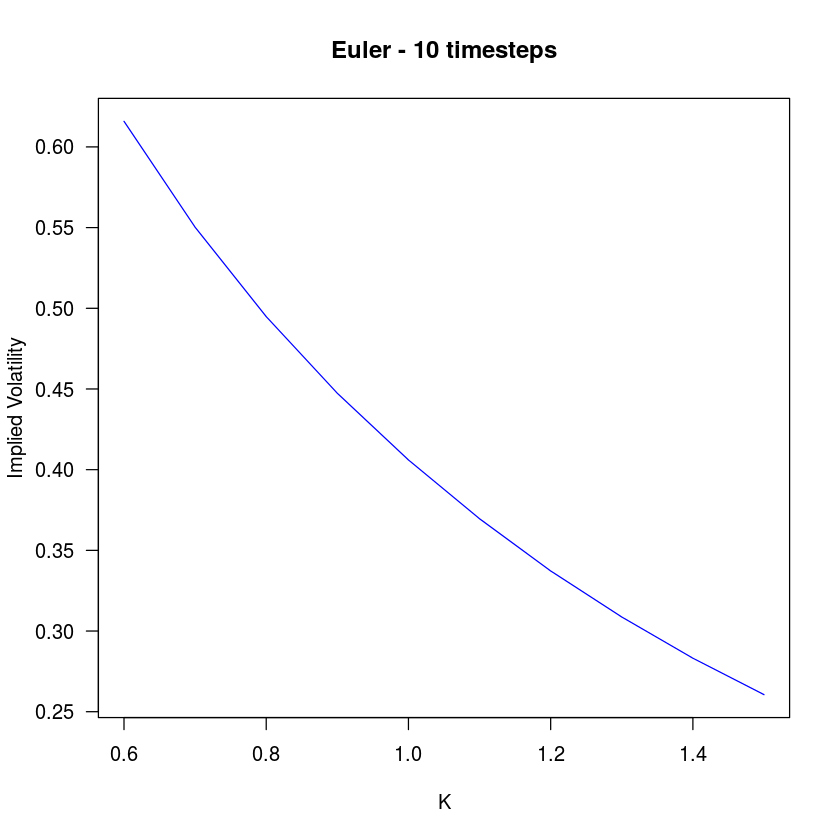

In [4]:
title <- 'Euler - 10 timesteps'
num_steps_euler <- 10
euler51_process <- General_Euler(num_paths, num_steps_euler,
                                 mu=make_constant_coefficient(0),
                                 sigma=sigma_from_paper,
                                 Texp=Texp, X0=X0)

one_d_from_paper_vols[title] <- run_simulation(euler51_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)

     K    Variance
1  0.6 0.095864996
2  0.7 0.081790404
3  0.8 0.066981521
4  0.9 0.051968552
5  1.0 0.037620735
6  1.1 0.024975942
7  1.2 0.014850070
8  1.3 0.007705762
9  1.4 0.003383656
10 1.5 0.001215514


Time Elapsed: 0.8485484 

     K       Price Implied.Vol
1  0.6 0.453523807   0.6187859
2  0.7 0.370692531   0.5518962
3  0.8 0.293152604   0.4952789
4  0.9 0.222515264   0.4468352
5  1.0 0.160389127   0.4047825
6  1.1 0.108135919   0.3674965
7  1.2 0.067028663   0.3345175
8  1.3 0.037302916   0.3050624
9  1.4 0.018163630   0.2789534
10 1.5 0.007445253   0.2554302


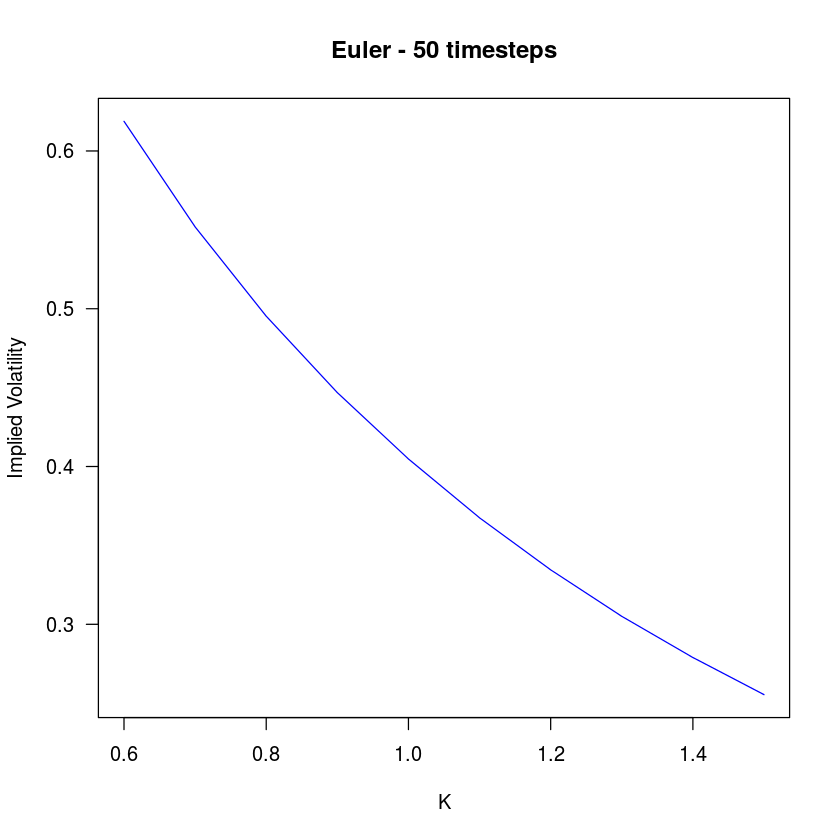

In [5]:
title <- 'Euler - 50 timesteps'
num_steps_euler <- 50
euler51_process <- General_Euler(num_paths, num_steps_euler,
                                 mu=make_constant_coefficient(0),
                                 sigma=sigma_from_paper,
                                 Texp=Texp, X0=X0)

one_d_from_paper_vols[title] <- run_simulation(euler51_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)

### Exact Method



Time Elapsed: 4.690612 

     K       Price Implied.Vol
1  0.6 0.453803909   0.6201220
2  0.7 0.370816547   0.5523718
3  0.8 0.293000197   0.4947914
4  0.9 0.222061889   0.4455723
5  1.0 0.159672361   0.4029488
6  1.1 0.107371219   0.3655741
7  1.2 0.066215660   0.3323269
8  1.3 0.036763772   0.3033231
9  1.4 0.017844725   0.2775362
10 1.5 0.007235039   0.2538895


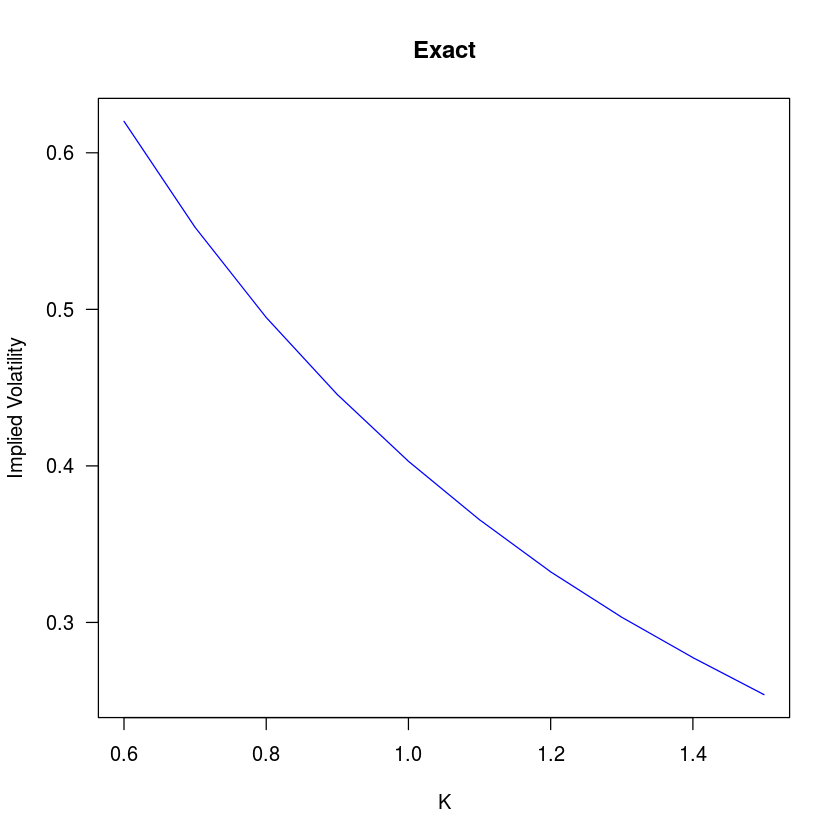

In [6]:
title <- 'Exact'
exact51_process <- Driftless_Exact(num_paths, beta,
                                   sigma_from_paper,
                                   sigma_deriv_from_paper,
                                   Texp=Texp, X0=X0)

one_d_from_paper_vols[title] <- run_simulation(exact51_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)

## Drifted process (equation 5.2)
$$ Y_0=0, \,\,\,\, dY_t = \frac{2\sigma X_t}{\left(1+X_t^2\right)^2}dt+dW_t 
\,\,\,\,
\mbox{where}
\,\,\,\,
2\sigma Y_t = X_t-X_0+\frac{X_t^3 - X_0^3}3 $$

Same parameters as equation 5.1

### Euler Scheme

     K    Variance
1  0.6 0.095133029
2  0.7 0.081010003
3  0.8 0.066224887
4  0.9 0.051309819
5  1.0 0.037124271
6  1.1 0.024588138
7  1.2 0.014559861
8  1.3 0.007497648
9  1.4 0.003247753
10 1.5 0.001138239


Time Elapsed: 0.3159273 

     K       Price Implied.Vol
1  0.6 0.454358266   0.6227613
2  0.7 0.371550431   0.5551830
3  0.8 0.293915974   0.4977196
4  0.9 0.223007421   0.4482060
5  1.0 0.160400364   0.4048112
6  1.1 0.107810538   0.3666786
7  1.2 0.066465961   0.3330017
8  1.3 0.036751039   0.3032819
9  1.4 0.017736497   0.2770528
10 1.5 0.007178701   0.2534726


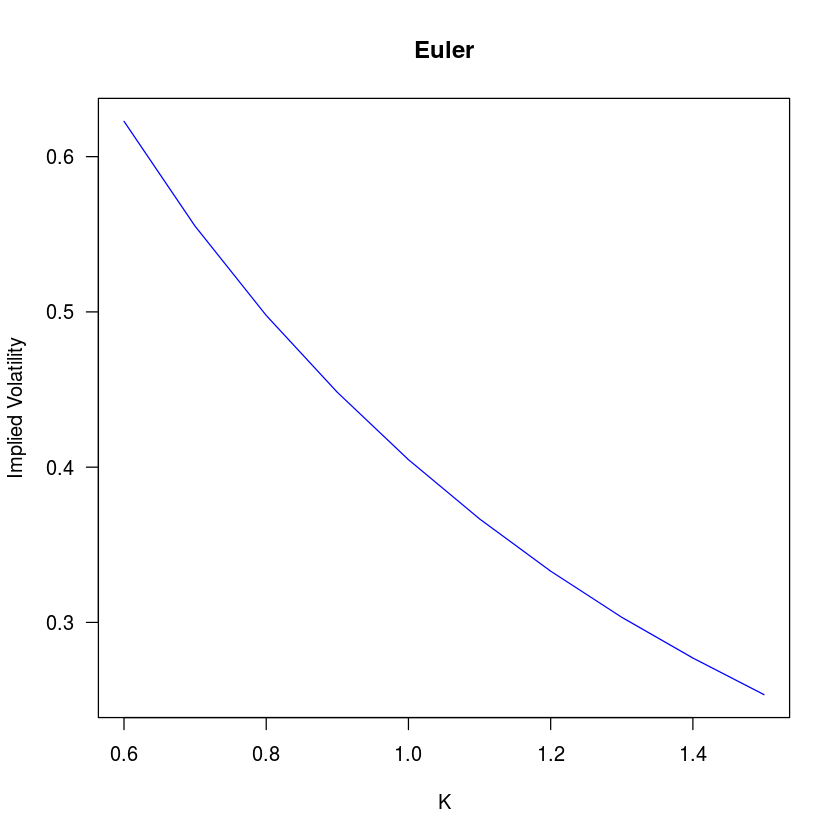

In [7]:
title <- 'Euler'
num_steps_euler <- 10
euler52_process <- General_Euler(num_paths, num_steps_euler,
                                 mu=mu_1d_from_paper,
                                 sigma=make_constant_coefficient(1),
                                 Texp=Texp, X0=X0,
                                 convert_y_to_x=convert_y_to_x_1d,
                                 convert_x_to_y=convert_x_to_y_1d)

one_d_from_paper_vols[title] <- run_simulation(euler52_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)

     K    Variance
1  0.6 0.171381022
2  0.7 0.138156301
3  0.8 0.107685310
4  0.9 0.080221648
5  1.0 0.056312385
6  1.1 0.036632842
7  1.2 0.021637284
8  1.3 0.011317863
9  1.4 0.005118287
10 1.5 0.001932338


Time Elapsed: 0.7791834 

     K      Price Implied.Vol
1  0.6 0.45706365   0.6355519
2  0.7 0.37384076   0.5639262
3  0.8 0.29570442   0.5034315
4  0.9 0.22432863   0.4518859
5  1.0 0.16143984   0.4074711
6  1.1 0.10859018   0.3686384
7  1.2 0.06695784   0.3343268
8  1.3 0.03709329   0.3043870
9  1.4 0.01793725   0.2779484
10 1.5 0.00728671   0.2542704


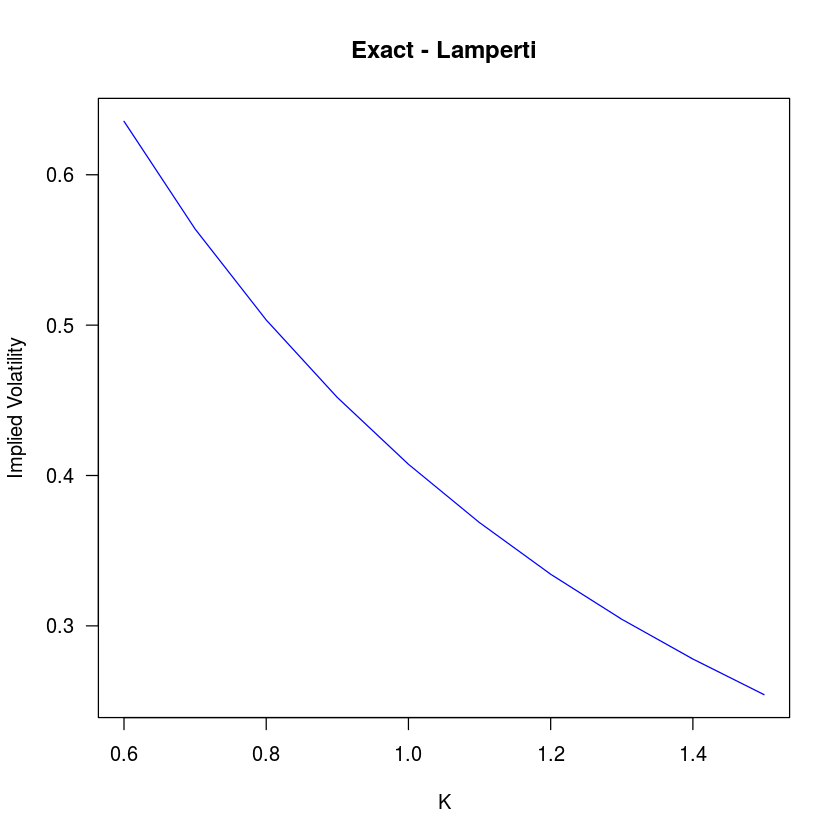

In [8]:
title <- 'Exact - Lamperti'
exact52_process <- Drifted_Exact(num_paths, beta,
                                 mu_1d_from_paper,
                                 sigma0=1,
                                 Texp=Texp, X0=X0,
                                 convert_y_to_x=convert_y_to_x_1d,
                                 convert_x_to_y=convert_x_to_y_1d)

one_d_from_paper_vols[title] <- run_simulation(exact52_process, strikes, Texp, X0, make_call_payoff,
                                                   plot_title=title, num_paths_to_plot=FALSE)

### Comparing Implied Volatilities

pdf 
  2

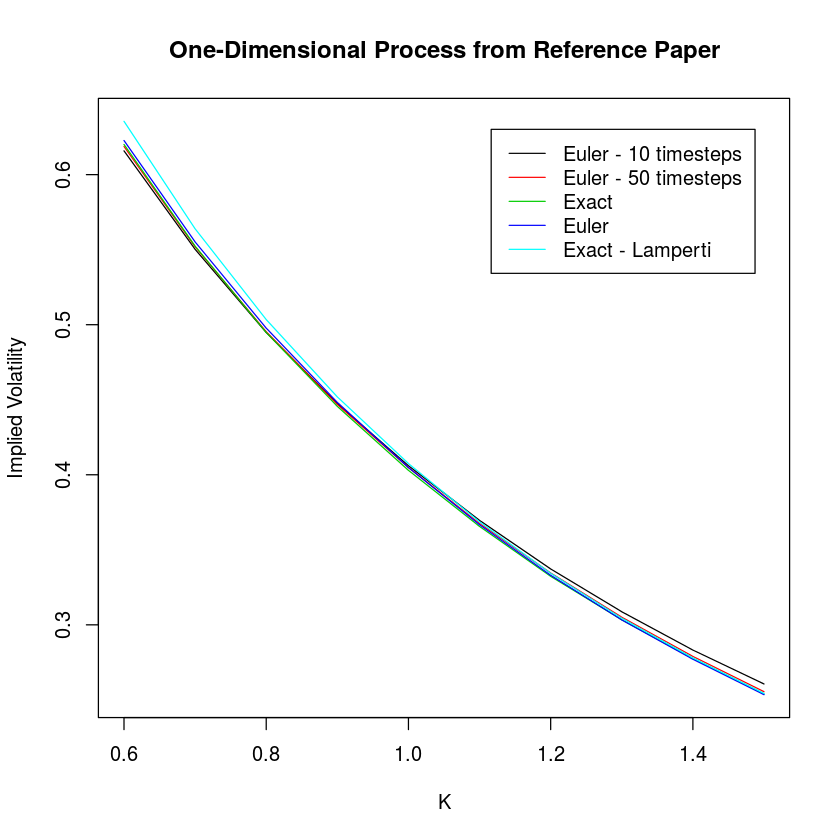

In [9]:
plot_values(one_d_from_paper_vols, 'One-Dimensional Process from Reference Paper')

## Drifted Multi-Dimensional (Section 5.2)
$$\frac{dX_t^i}{X_t^i}=\frac12dW_t^i + 0.1(\sqrt{X_t^i}-1)dt
\,\,\,\,
\mbox{where}
\,\,\,\,
X_0^i=1,
\,\,\,\,
d\langle W^i,W^j\rangle_t=0.5dt,
\,\,\,\,
i\neq j=1,...,d.$$

### Parameters

In [5]:
d <- 4

num_paths <- 10000*d
num_steps_euler <- 100
beta <- 0.2

Texp <- 1
X0 <- rep(1, d)
strikes <- seq(0.6, 1.5, by=0.1)
multi_d_from_paper_vols <- data.frame(K=strikes)

### Euler Scheme



Time Elapsed: 4.459665 

     K      Price Implied.Vol
1  0.6 0.42293009   0.4562574
2  0.7 0.34198786   0.4364789
3  0.8 0.27186737   0.4263561
4  0.9 0.21318069   0.4208274
5  1.0 0.16553004   0.4179443
6  1.1 0.12767807   0.4165428
7  1.2 0.09798883   0.4157698
8  1.3 0.07506347   0.4156460
9  1.4 0.05748145   0.4159065
10 1.5 0.04391327   0.4159306


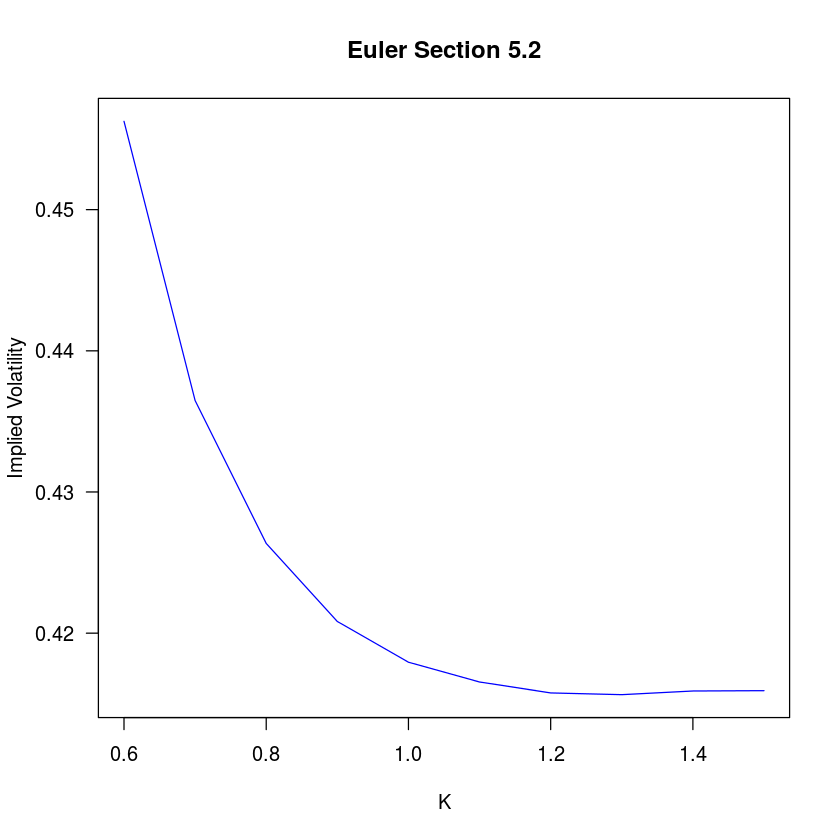

In [6]:
title <- 'Euler Section 5.2'
euler_section_52_process <- General_Euler_Multi_D(num_paths, num_steps_euler,
                                 mu=sapply(1:d, make_mu_section_52_euler),
                                 sigma=sapply(1:d, make_sigma_section_52_euler),
                                 cov_matrix=matrix(.5, nrow=d, ncol=d) + diag(d)*.5,
                                 Texp=Texp, X0=X0)

multi_d_from_paper_vols[title] <- run_simulation(euler_section_52_process, strikes, Texp, X0[1], make_basket_call_payoff, plot_title=title)

### Exact method



Time Elapsed: 13.69454 

     K      Price Implied.Vol
1  0.6 0.42635677   0.4770074
2  0.7 0.34655634   0.4557970
3  0.8 0.27766703   0.4453321
4  0.9 0.22001207   0.4398625
5  1.0 0.17306760   0.4372751
6  1.1 0.13547440   0.4360866
7  1.2 0.10585147   0.4359413
8  1.3 0.08249348   0.4358509
9  1.4 0.06402117   0.4352798
10 1.5 0.04964785   0.4348421


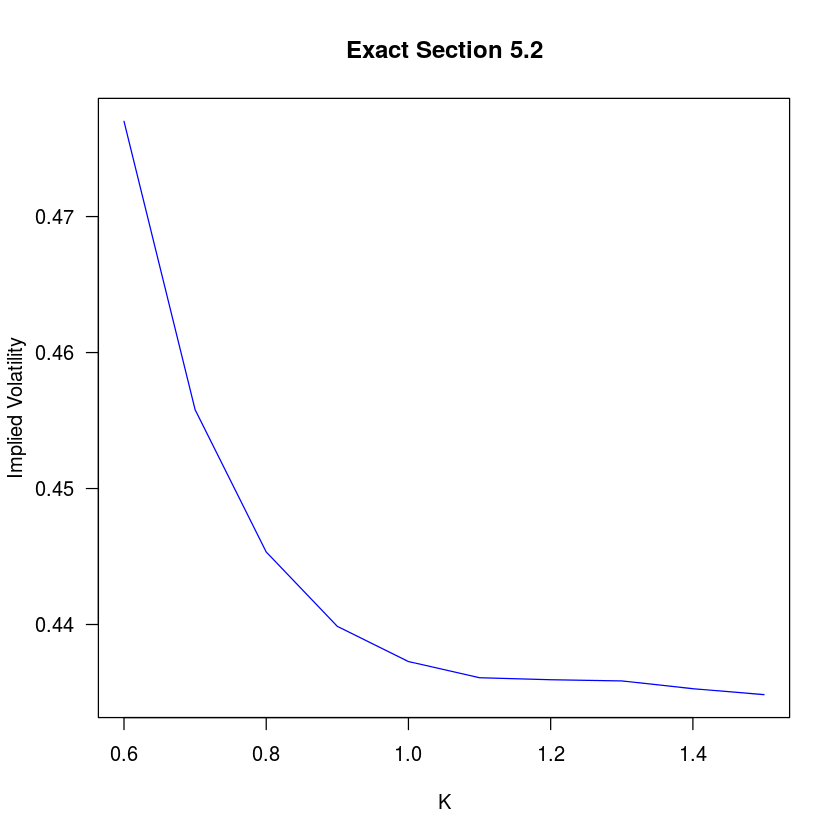

In [7]:
title <- 'Exact Section 5.2'
exact_section_52_process <- Drifted_Exact_Multi_D(num_paths, beta,
                                 mu=sapply(1:d, make_mu_from_paper_multi_dimension_lamperti),
                                 sigma0=diag(d),
                                 cov_matrix=matrix(.5, nrow=d, ncol=d) + diag(d)*.5,
                                 Texp=Texp, X0=X0,
                                 convert_y_to_x=convert_y_to_x_multi_d,
                                 convert_x_to_y=convert_x_to_y_multi_d)

multi_d_from_paper_vols[title] <- run_simulation(exact_section_52_process, strikes, Texp, X0[1], make_basket_call_payoff_exact, plot_title=title)

### Comparing Implied Volatilities

pdf 
  2

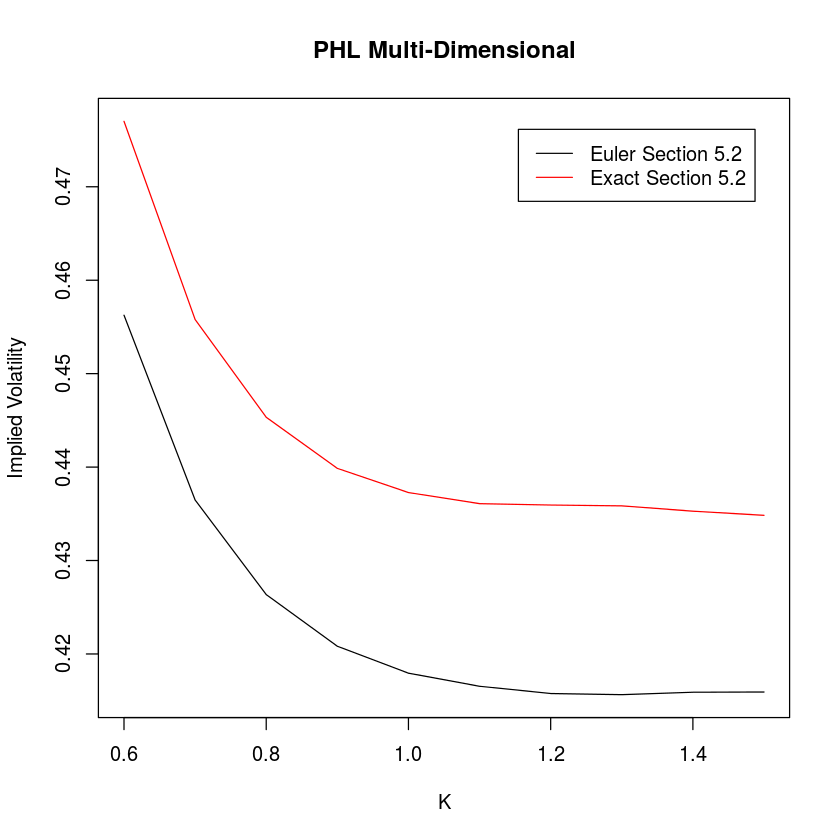

In [8]:
plot_values(multi_d_from_paper_vols, 'PHL Multi-Dimensional')

## Heston Variance Process

$$ dv_t = -\lambda(v_t-\bar v)dt + \eta \sqrt{v_t}dW_t$$
The BCC and BCC2 parameters fail the Feller condition.  Using those parameters would make 0 an attainable variance.  We therefore use the BCC1 parameters.

### Parameters

In [10]:
paramsBCC  <- list(lambda = 1.15,rho = -0.64,eta = 0.39,  vbar = 0.04,v0 = 0.04)
paramsBCC1 <- list(lambda = 1.15,rho = -0.64,eta = 0.39/2,vbar = 0.04,v0 = 0.04)
paramsBCC2 <- list(lambda = 1.15,rho = -0.64,eta = 0.39*2,vbar = 0.04,v0 = 0.04)

c(feller(paramsBCC), feller(paramsBCC1), feller(paramsBCC2))

[1] FALSE  TRUE FALSE

In [11]:
params <- paramsBCC1
cat('Is the Feller condition satisfied: ', feller(params))

y_to_x_hv <- make_convert_y_to_x_heston_variance(params$eta, params$v0)
x_to_y_hv <- make_convert_x_to_y_heston_variance(params$eta, params$v0)

num_paths <- 1000000
num_steps_euler <- 100
beta <- 0.2

Texp <- 1
X0 <- params$v0
strikes <- seq(0.05, 0.12, by=0.01)
heston_variance_vols <- data.frame(K=strikes)

Is the Feller condition satisfied:  TRUE

### Euler Scheme

[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=0 !!!"
[1] "(mu) v went <=0 !!!"
[1] "(CIR) x went <=

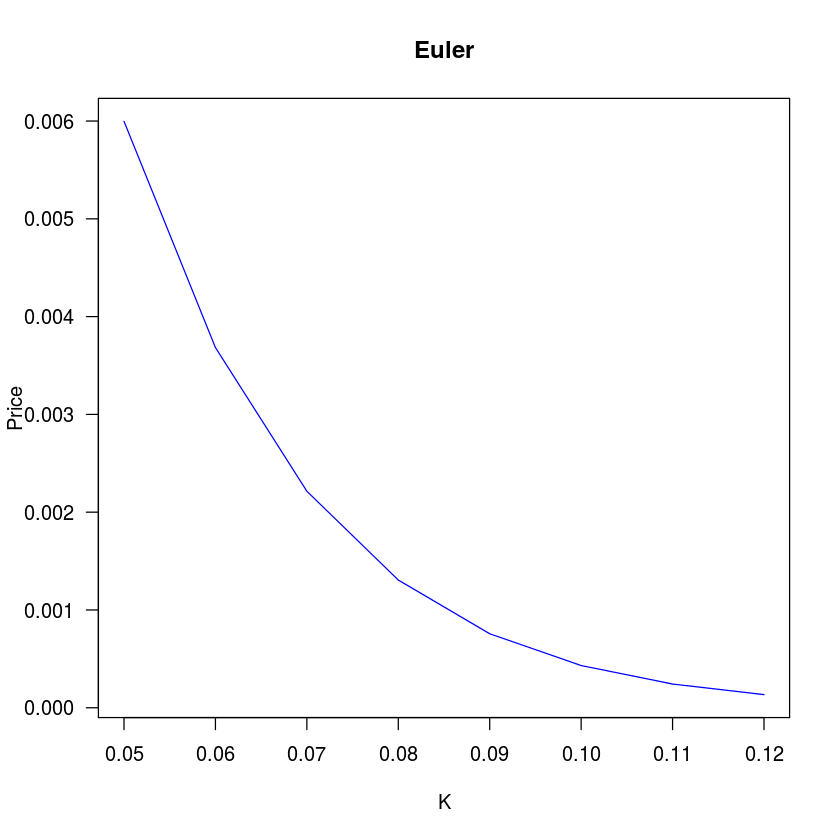

In [12]:
title <- 'Euler'
euler_heston_variance <- General_Euler(num_paths, num_steps_euler,
                                       mu=make_mu_heston_variance(params$lambda, params$vbar),
                                       sigma=make_sigma_cir(params$eta),
                                       Texp=Texp, X0=X0)

heston_variance_vols[title] <- run_simulation(euler_heston_variance, strikes, Texp, X0, make_call_payoff,
                                              plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

## Lamperti Transform of Heston Variance Process

$$ 
dY_t = \left(\frac{-\lambda}{\eta\sqrt{v_t}}(v_t-\bar v) - \frac{\eta}{4\sqrt{v_t}}\right)dt + dW_t
\,\,\,\,
\mbox{where}
\,\,\,\,
Y_t = \frac2\eta\left(\sqrt{v_t} - \sqrt{v_0}\right)
$$
The BCC and BCC2 parameters fail the Feller condition. 
Using those parameters would make 0 an attainable variance.
We therefore use the BCC1 parameters.

Using parameters from regular Heston variance

### Euler Scheme

     K     Variance
1 0.05 1.999309e-04
2 0.06 1.270094e-04
3 0.07 7.764480e-05
4 0.08 4.622429e-05
5 0.09 2.706649e-05
6 0.10 1.574094e-05
7 0.11 9.183181e-06
8 0.12 5.434382e-06


Time Elapsed: 18.85742 

     K        Price
1 0.05 0.0060058309
2 0.06 0.0036955576
3 0.07 0.0022251995
4 0.08 0.0013141894
5 0.09 0.0007633125
6 0.10 0.0004374068
7 0.11 0.0002487430
8 0.12 0.0001402278


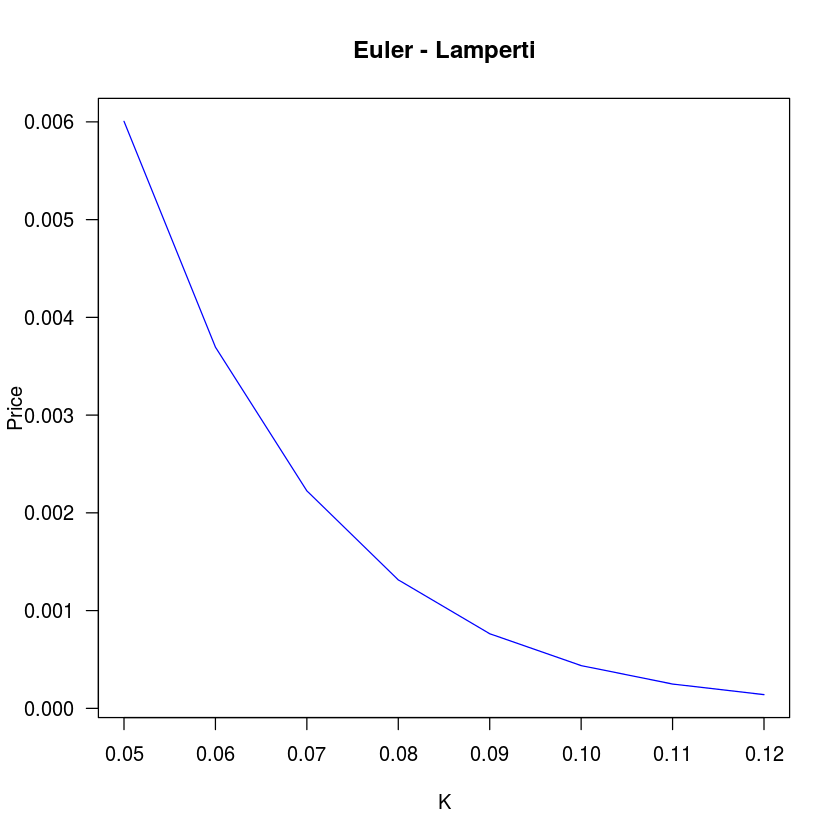

In [13]:
title <- 'Euler - Lamperti'
euler_heston_variance_lamperti <- General_Euler(num_paths, num_steps_euler,
                                                mu=make_mu_heston_variance_lamperti(params$lambda, params$vbar,
                                                                                    params$eta, params$v0),
                                                sigma=make_constant_coefficient(1),
                                                Texp=Texp, X0=X0,
                                                convert_y_to_x=y_to_x_hv,
                                                convert_x_to_y=x_to_y_hv)
 
heston_variance_vols[title] <- run_simulation(euler_heston_variance_lamperti, strikes, Texp, X0, make_call_payoff,
                                              plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Exact Scheme

     K     Variance
1 0.05 6.902180e+15
2 0.06 6.902179e+15
3 0.07 6.902179e+15
4 0.08 6.902178e+15
5 0.09 6.902178e+15
6 0.10 6.902178e+15
7 0.11 6.902177e+15
8 0.12 6.902177e+15


Time Elapsed: 7.441117 

     K     Price
1 0.05 -98440.62
2 0.06 -98440.63
3 0.07 -98440.63
4 0.08 -98440.63
5 0.09 -98440.63
6 0.10 -98440.63
7 0.11 -98440.63
8 0.12 -98440.63


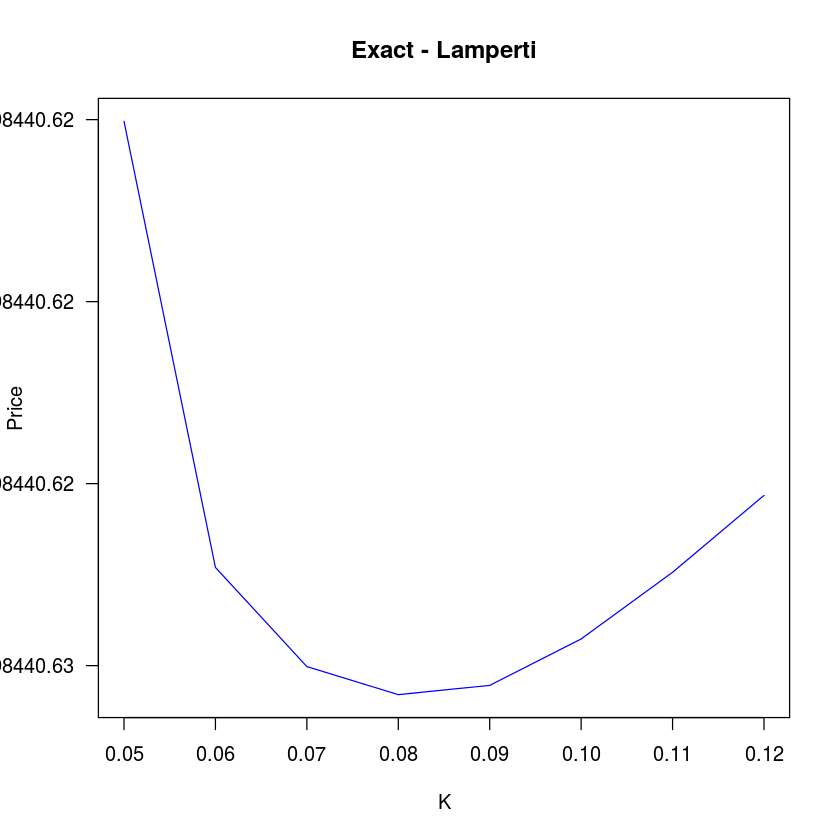

In [14]:
title <- 'Exact - Lamperti'
exact_heston_variance_lamperti <- Drifted_Exact(num_paths, beta,
                                                mu=make_mu_heston_variance_lamperti(params$lambda, params$vbar,
                                                                                    params$eta, params$v0),
                                                sigma0=1,
                                                Texp=Texp, X0=X0,
                                                convert_y_to_x=y_to_x_hv, 
                                                convert_x_to_y=x_to_y_hv)

heston_variance_vols[title] <- run_simulation(exact_heston_variance_lamperti, strikes, Texp, X0,
                                              make_call_payoff, plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Comparing Prices

pdf 
  2

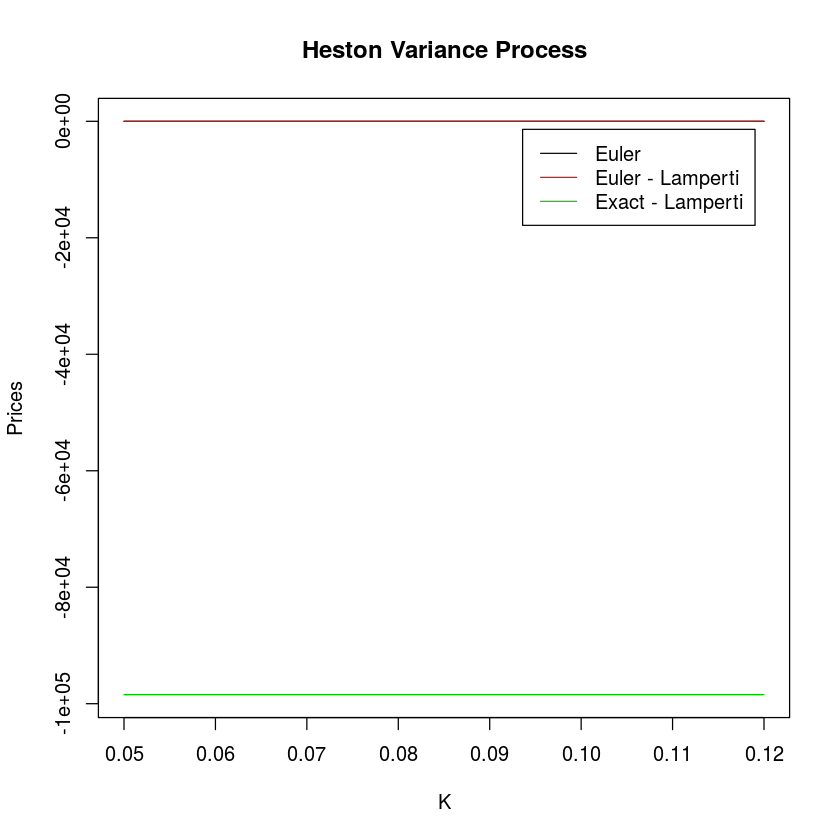

In [15]:
plot_values(heston_variance_vols, 'Heston Variance Process', ylab='Prices')

## Heston Variance Process - Avoiding truncation

$$ dv_t = -\lambda(v_t-\bar v)dt + \eta \sqrt{v_t}dW_t$$
This retries the Heston variance process using parameters that avoid truncation by avoiding getting close to zero.

### Parameters

In [16]:
params <- list(lambda = 1.15,rho = -0.64,eta = 0.39/2,vbar = 1.0,v0 = 1.0)
cat('Is the Feller condition satisfied: ', feller(params))

y_to_x_hv2 <- make_convert_y_to_x_heston_variance(params$eta, params$v0)
x_to_y_hv2 <- make_convert_x_to_y_heston_variance(params$eta, params$v0)

num_paths <- 1000000
num_steps_euler <- 100
beta <- 0.2

Texp <- 1
X0 <- params$v0
strikes <- seq(0.5, 1.5, by=0.1)
heston_variance_vols_2 <- data.frame(K=strikes)

Is the Feller condition satisfied:  TRUE

### Euler Scheme

     K     Variance
1  0.5 1.494517e-02
2  0.6 1.494390e-02
3  0.7 1.487867e-02
4  0.8 1.408097e-02
5  0.9 1.080714e-02
6  1.0 5.553813e-03
7  1.1 1.768206e-03
8  1.2 3.623047e-04
9  1.3 5.267119e-05
10 1.4 6.100871e-06
11 1.5 5.511768e-07


Time Elapsed: 20.38475 

     K        Price
1  0.5 5.001033e-01
2  0.6 4.001048e-01
3  0.7 3.002050e-01
4  0.8 2.019196e-01
5  0.9 1.131907e-01
6  1.0 4.878685e-02
7  1.1 1.528623e-02
8  1.2 3.412430e-03
9  1.3 5.480875e-04
10 1.4 6.901469e-05
11 1.5 7.333720e-06


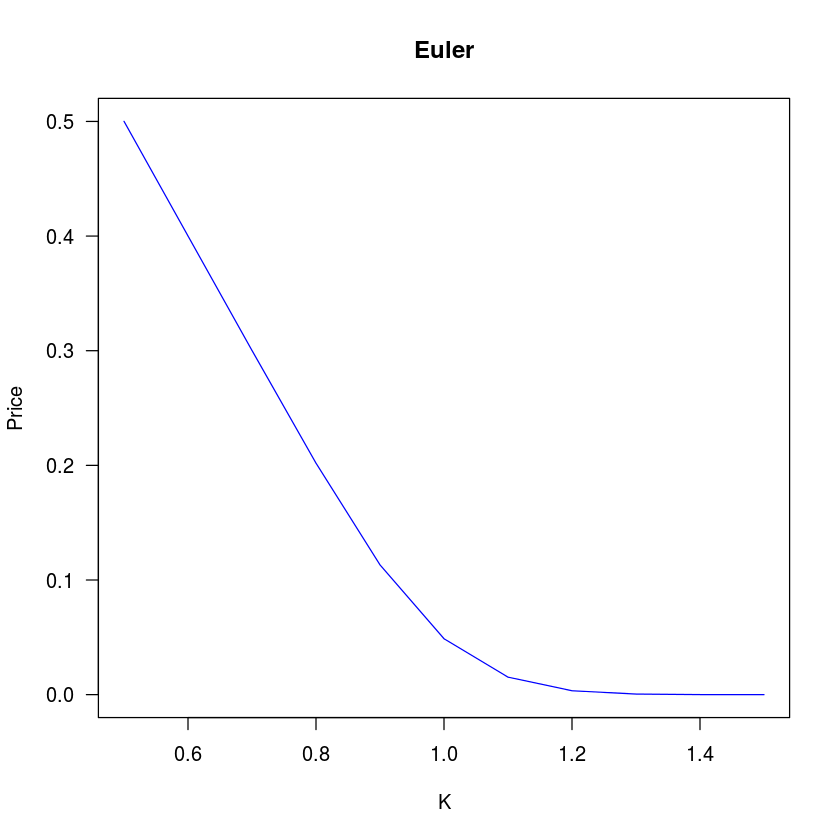

In [17]:
title <- 'Euler'
euler_heston_variance_2 <- General_Euler(num_paths, num_steps_euler,
                                         mu=make_mu_heston_variance(params$lambda, params$vbar),
                                         sigma=make_sigma_cir(params$eta),
                                         Texp=Texp, X0=X0)

heston_variance_vols_2[title] <- run_simulation(euler_heston_variance_2, strikes, Texp, X0, make_call_payoff,
                                                plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

## Lamperti Transform of Heston Variance Process - Avoiding Truncation

$$ 
dY_t = \left(\frac{-\lambda}{\eta\sqrt{v_t}}(v_t-\bar v) - \frac{\eta}{4\sqrt{v_t}}\right)dt + dW_t
\,\,\,\,
\mbox{where}
\,\,\,\,
Y_t = \frac2\eta\left(\sqrt{v_t} - \sqrt{v_0}\right)
$$

### Euler Scheme

     K     Variance
1  0.5 1.499001e-02
2  0.6 1.498865e-02
3  0.7 1.492365e-02
4  0.8 1.412402e-02
5  0.9 1.085161e-02
6  1.0 5.584975e-03
7  1.1 1.784433e-03
8  1.2 3.684431e-04
9  1.3 5.262868e-05
10 1.4 5.529236e-06
11 1.5 5.089946e-07


Time Elapsed: 19.25648 

     K        Price
1  0.5 5.001147e-01
2  0.6 4.001163e-01
3  0.7 3.002163e-01
4  0.8 2.019355e-01
5  0.9 1.131995e-01
6  1.0 4.886803e-02
7  1.1 1.537292e-02
8  1.2 3.460845e-03
9  1.3 5.625858e-04
10 1.4 6.521802e-05
11 1.5 6.170945e-06


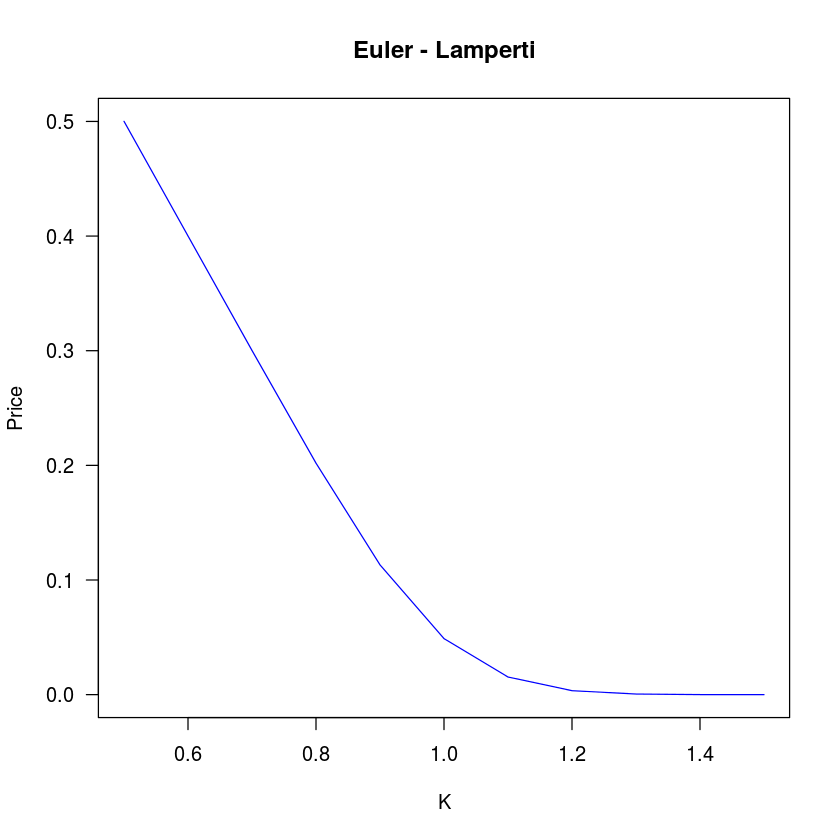

In [18]:
title <- 'Euler - Lamperti'
euler_heston_variance_lamperti_2 <- General_Euler(num_paths, num_steps_euler,
                                                  mu=make_mu_heston_variance_lamperti(params$lambda, params$vbar,
                                                                                      params$eta, params$v0),
                                                  sigma=make_constant_coefficient(1),
                                                  Texp=Texp, X0=X0,
                                                  convert_y_to_x=y_to_x_hv2, 
                                                  convert_x_to_y=x_to_y_hv2)

heston_variance_vols_2[title] <- run_simulation(euler_heston_variance_lamperti_2, strikes, Texp, X0, make_call_payoff,
                                                plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Exact Scheme

     K    Variance
1  0.5 13.45046295
2  0.6 13.36971968
3  0.7 13.12522856
4  0.8 12.41323213
5  0.9 10.88354354
6  1.0  8.82386380
7  1.1  5.33174724
8  1.2  1.32211756
9  1.3  0.30045438
10 1.4  0.12849713
11 1.5  0.07896999


Time Elapsed: 7.583874 

     K         Price
1  0.5  0.4981412831
2  0.6  0.3982464310
3  0.7  0.2990937932
4  0.8  0.2008787700
5  0.9  0.1126178568
6  1.0  0.0481713656
7  1.1  0.0139299685
8  1.2  0.0026139555
9  1.3 -0.0003295703
10 1.4 -0.0003461477
11 1.5 -0.0002688938


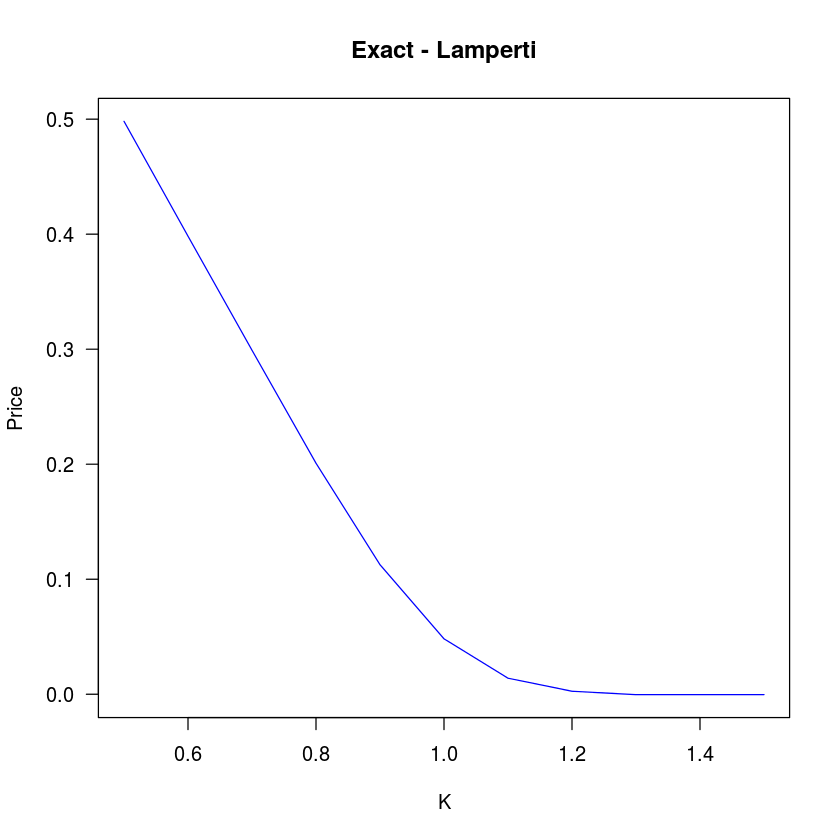

In [19]:
title <- 'Exact - Lamperti'
exact_heston_variance_lamperti_2 <- Drifted_Exact(num_paths, beta,
                                                  mu=make_mu_heston_variance_lamperti(params$lambda, params$vbar,
                                                                                      params$eta, params$v0),
                                                  sigma0=1,
                                                  Texp=Texp, X0=X0,
                                                  convert_y_to_x=y_to_x_hv2, 
                                                  convert_x_to_y=x_to_y_hv2)

heston_variance_vols_2[title] <- run_simulation(exact_heston_variance_lamperti_2, strikes, Texp, X0,
                                              make_call_payoff, plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Comparing Prices

pdf 
  2

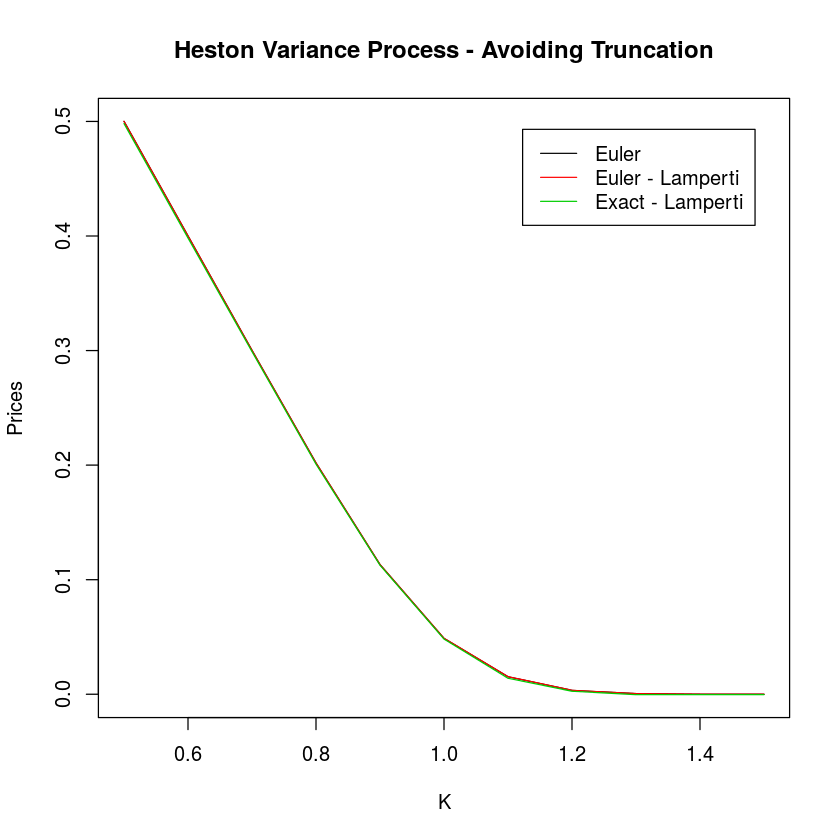

In [20]:
plot_values(heston_variance_vols_2, 'Heston Variance Process - Avoiding Truncation', ylab='Prices')

## Black Scholes Process

$$ X_0=1,\;\;dX_t = \mu_0 X_t dt + \sigma_0 X_t dW_t ,\;\;\mu_0=0.1, \;\; \sigma_0=0.3$$

### Parameters

In [21]:
num_paths <- 1000000
num_steps_euler <- 100
beta <- 0.2

Texp <- 1
X0 <- 1
mu0 <- 0.1
sigma0 <- 0.3

y_to_x_bs <- make_convert_y_to_x_black_scholes(sigma0, X0)
x_to_y_bs <- make_convert_x_to_y_black_scholes(sigma0, X0)

strikes <- seq(0.5, 1.5, by=0.1)
black_scholes_vols <- data.frame(K=strikes)

### Euler Scheme

     K   Variance
1  0.5 0.11414895
2  0.6 0.11239756
3  0.7 0.10748963
4  0.8 0.09820163
5  0.9 0.08492307
6  1.0 0.06950051
7  1.1 0.05408160
8  1.2 0.04033251
9  1.3 0.02905647
10 1.4 0.02037263
11 1.5 0.01399345


Time Elapsed: 16.03942 

     K      Price
1  0.5 0.60512023
2  0.6 0.50673005
3  0.7 0.41217127
4  0.8 0.32497960
5  0.9 0.24848146
6  1.0 0.18459821
7  1.1 0.13370114
8  1.2 0.09470891
9  1.3 0.06587712
10 1.4 0.04515243
11 1.5 0.03056419


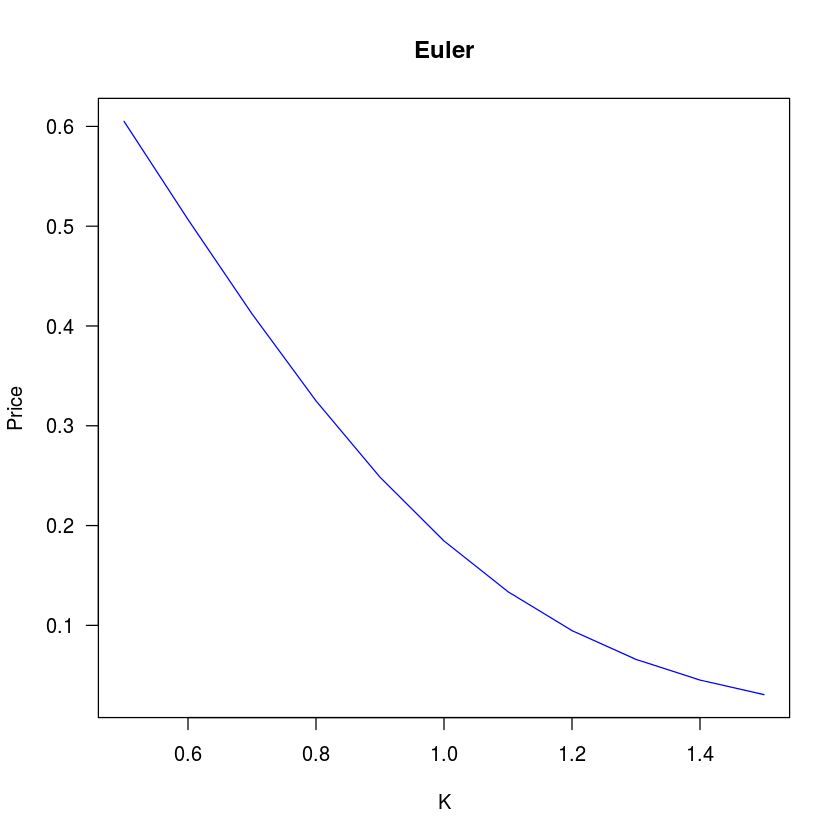

In [22]:
title <- 'Euler'
euler_black_scholes <- General_Euler(num_paths, num_steps_euler,
                                       mu=make_affine_coefficient(mu0, 0),
                                       sigma=make_affine_coefficient(sigma0, 0),
                                       Texp=Texp, X0=X0)

black_scholes_vols[title] <- run_simulation(euler_black_scholes, strikes, Texp, X0, make_call_payoff,
                                            plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

## Lamperti Transform of Black Scholes Process
.
$$ 
dY_t = \left(\frac{\mu}{\sigma}-\frac{\sigma}{2}\right)dt + dW_t
\,\,\,\,
\mbox{where}
\,\,\,\,
Y_t = \frac{1}{\sigma}\ln\left(\frac{X_t}{X_0} \right)
$$

### Euler Scheme

     K   Variance
1  0.5 0.11443142
2  0.6 0.11270785
3  0.7 0.10781367
4  0.8 0.09851521
5  0.9 0.08521956
6  1.0 0.06976774
7  1.1 0.05432597
8  1.2 0.04054652
9  1.3 0.02923837
10 1.4 0.02052719
11 1.5 0.01412087


Time Elapsed: 13.83967 

     K      Price
1  0.5 0.60499379
2  0.6 0.50657886
3  0.7 0.41200728
4  0.8 0.32483451
5  0.9 0.24837910
6  1.0 0.18457327
7  1.1 0.13374373
8  1.2 0.09483990
9  1.3 0.06606064
10 1.4 0.04532133
11 1.5 0.03072096


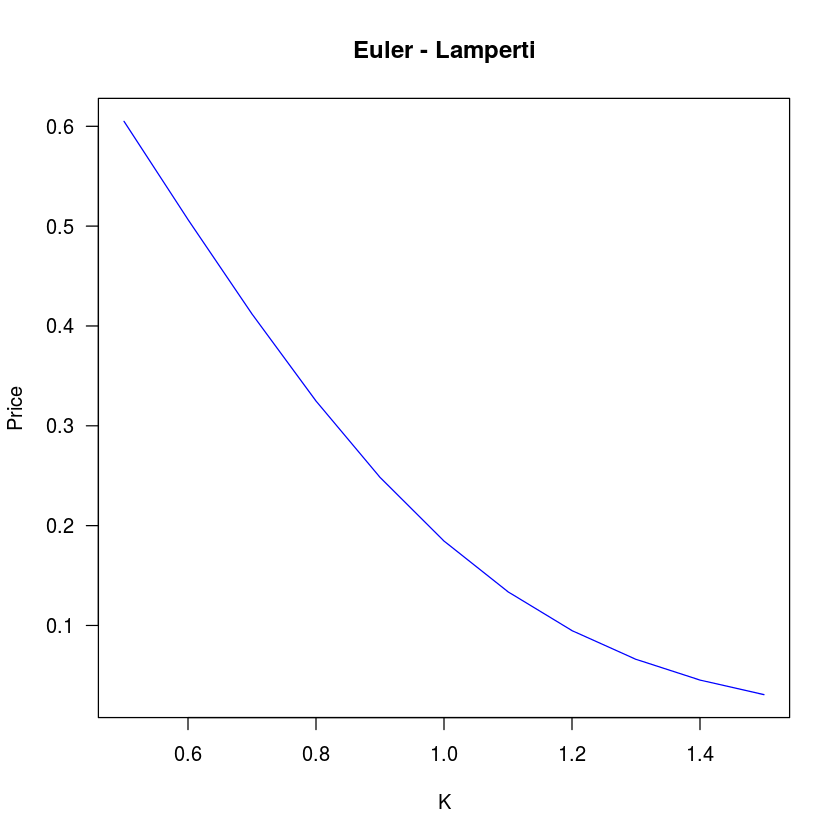

In [23]:
title <- 'Euler - Lamperti'
euler_black_scholes_lamperti <- General_Euler(num_paths, num_steps_euler,
                                       mu=make_mu_black_scholes_lamperti(mu0, sigma0),
                                       sigma=make_constant_coefficient(1),
                                       Texp=Texp, X0=X0,
                                       convert_y_to_x=y_to_x_bs,
                                       convert_x_to_y=x_to_y_bs)

black_scholes_vols[title] <- run_simulation(euler_black_scholes_lamperti, strikes, Texp, X0, make_call_payoff,
                                            plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Exact Scheme

     K   Variance
1  0.5 0.22187921
2  0.6 0.19551783
3  0.7 0.17027512
4  0.8 0.14465093
5  0.9 0.11865567
6  1.0 0.09360166
7  1.1 0.07107079
8  1.2 0.05216727
9  1.3 0.03723549
10 1.4 0.02598952
11 1.5 0.01783504


Time Elapsed: 6.862108 

     K      Price
1  0.5 0.60594140
2  0.6 0.50751835
3  0.7 0.41292443
4  0.8 0.32572875
5  0.9 0.24922612
6  1.0 0.18534905
7  1.1 0.13446535
8  1.2 0.09550125
9  1.3 0.06661090
10 1.4 0.04579439
11 1.5 0.03109810


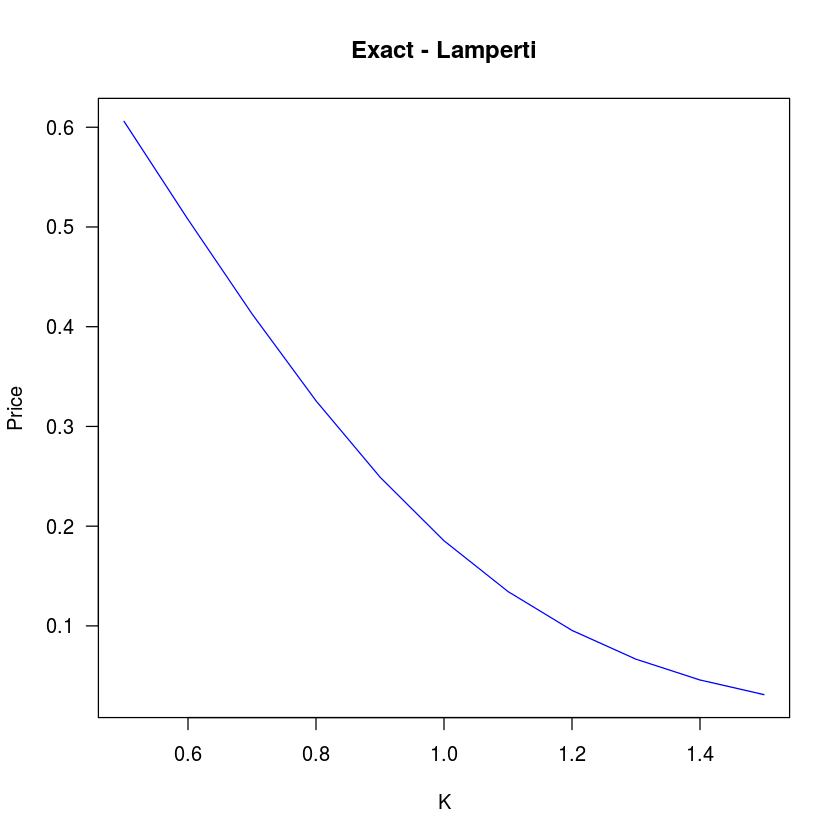

In [24]:
title <- 'Exact - Lamperti'
exact_black_scholes_lamperti <- Drifted_Exact(num_paths, beta,
                                                  mu=make_mu_black_scholes_lamperti(mu0, sigma0),
                                                  sigma0=1,
                                                  Texp=Texp, X0=X0,
                                                  convert_y_to_x=y_to_x_bs,
                                                  convert_x_to_y=x_to_y_bs)

black_scholes_vols[title] <- run_simulation(exact_black_scholes_lamperti, strikes, Texp, X0, make_call_payoff,
                                            plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Comparing Implied Volatilities

pdf 
  2

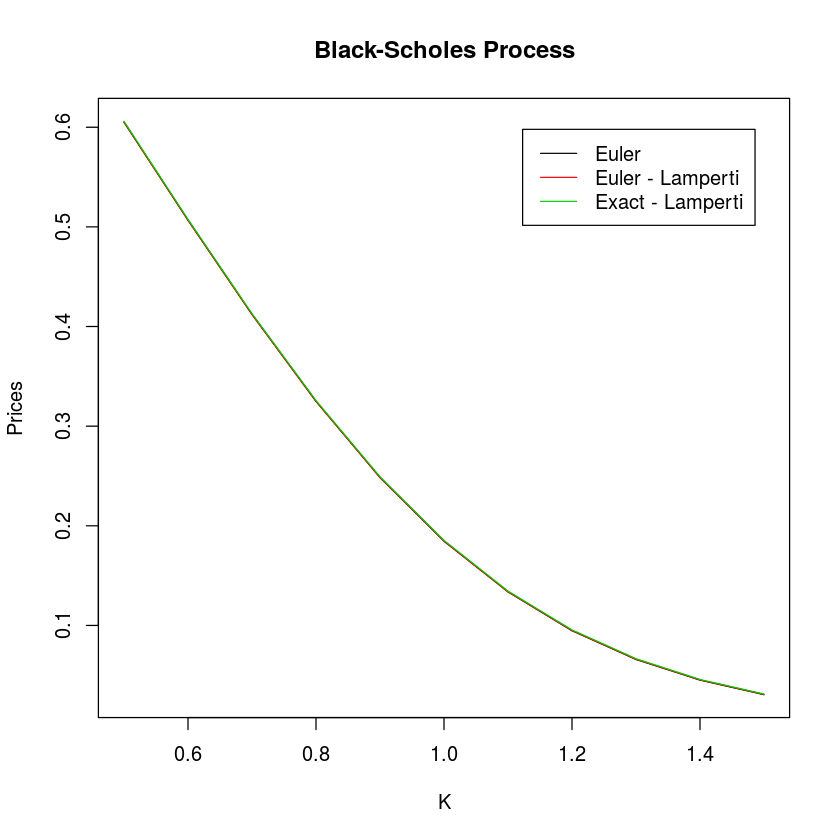

In [25]:
plot_values(black_scholes_vols, 'Black-Scholes Process', ylab='Prices')

## Sine Process
$$ X_0=10, \,\,\,\, dX_t = (\sin(2\pi nt - \frac{\pi}{2})+1) dt + \sigma_0 dW_t$$
where $\sigma_0 = 0.3 X_0$

Note that price under this model is 
$$ \mathbb{E}[(X_T-K)^+|X_0] = (\mu-K) N(a) + \frac{\sigma_0\sqrt{T}}{\sqrt{2\pi}}\exp\left(-\frac{a^2}{2}\right) $$
where
\begin{align*}
\mu &= X_0-\frac{1}{2\pi n}\cos\left(2\pi nT - \frac{\pi}{2}\right)+T \\
a &= \frac{\mu-K}{\sigma_0\sqrt{T}}
\end{align*}
and $N(\cdot)$ is the standard normal CDF.

### Parameters

In [26]:
num_paths <- 1000000
beta <- 0.2

Texp <- 1
X0 <- 10
n <- 100
sigma0 <- 0.3*X0
strikes <- seq(9.5, 10.5, by=0.1)
sin_vols <- data.frame(K=strikes)

### Closed Form Solution

In [27]:
true_price_sine <- function(K){
    mu <- X0 - cos(2*pi*n*Texp - 0.5*pi)/(2*pi*n) + Texp
    a <- (mu-K)/(sigma0*sqrt(Texp))
    (mu-K)*pnorm(a) + sigma0*sqrt(Texp)/sqrt(2*pi)*exp(-0.5*a^2)
}
sin_vols['True Value'] <- true_price_sine(strikes)

### Euler Scheme - 100 timesteps

      K Variance
1   9.5 3.695810
2   9.6 3.569419
3   9.7 3.444265
4   9.8 3.320502
5   9.9 3.198283
6  10.0 3.077711
7  10.1 2.958918
8  10.2 2.842016
9  10.3 2.727174
10 10.4 2.614501
11 10.5 2.504093


Time Elapsed: 13.94252 

      K     Price
1   9.5 1.4652758
2   9.6 1.4092526
3   9.7 1.3545439
4   9.8 1.3011549
5   9.9 1.2490883
6  10.0 1.1983615
7  10.1 1.1489789
8  10.2 1.1009469
9  10.3 1.0542430
10 10.4 1.0088672
11 10.5 0.9648181


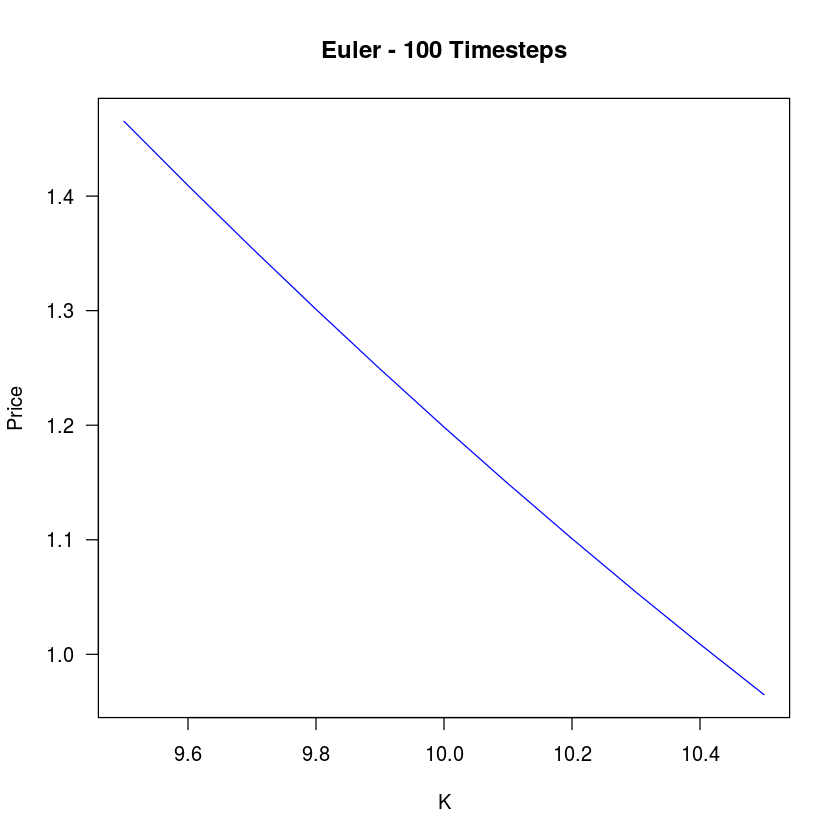

In [28]:
title <- 'Euler - 100 Timesteps'
num_steps_euler <- 100
euler_sin <- General_Euler(num_paths, num_steps_euler,
                           mu=make_mu_sin(a=1, k=2*pi*n, phi=-0.5*pi, b=1),
                           sigma=make_constant_coefficient(sigma0),
                           Texp=Texp, X0=X0)

sin_vols[title] <- run_simulation(euler_sin, strikes, Texp, X0, make_call_payoff,
                                  plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Euler Scheme - 99 timesteps

      K Variance
1   9.5 4.986891
2   9.6 4.857342
3   9.7 4.727244
4   9.8 4.596801
5   9.9 4.466221
6  10.0 4.335656
7  10.1 4.205311
8  10.2 4.075409
9  10.3 3.946130
10 10.4 3.817596
11 10.5 3.689980


Time Elapsed: 13.62071 

      K    Price
1   9.5 2.096614
2   9.6 2.028028
3   9.7 1.960650
4   9.8 1.894491
5   9.9 1.829560
6  10.0 1.765880
7  10.1 1.703457
8  10.2 1.642289
9  10.3 1.582386
10 10.4 1.523774
11 10.5 1.466458


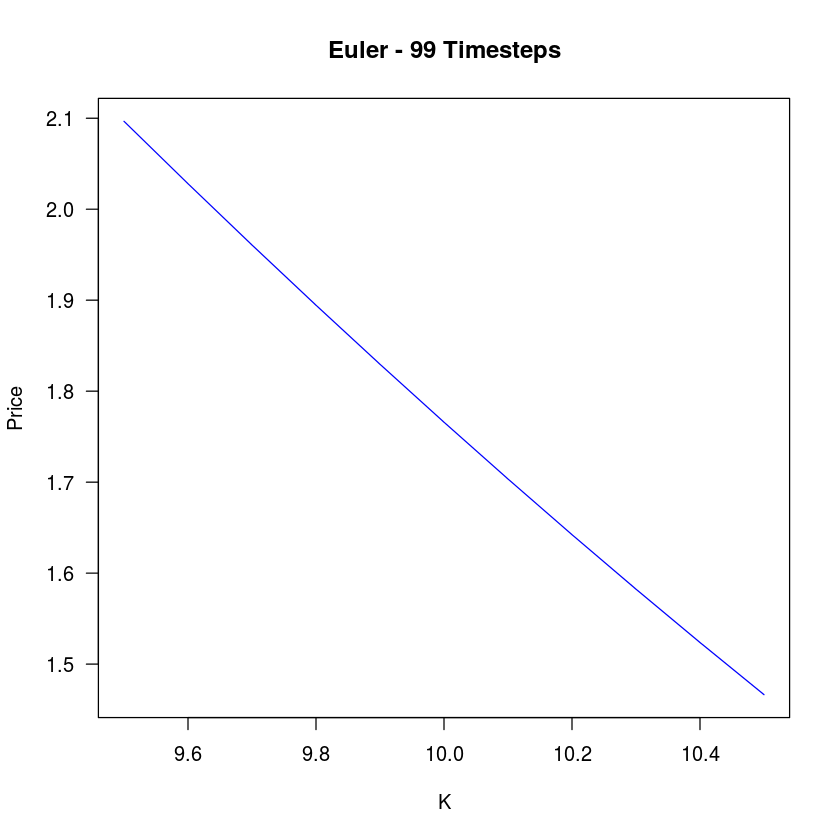

In [29]:
title <- 'Euler - 99 Timesteps'
num_steps_euler <- 99
euler_sin <- General_Euler(num_paths, num_steps_euler,
                           mu=make_mu_sin(a=1, k=2*pi*n, phi=-0.5*pi, b=1),
                           sigma=make_constant_coefficient(sigma0),
                           Texp=Texp, X0=X0)

sin_vols[title] <- run_simulation(euler_sin, strikes, Texp, X0, make_call_payoff,
                                  plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Exact Scheme

      K Variance
1   9.5 269.1757
2   9.6 262.0943
3   9.7 255.2411
4   9.8 248.5516
5   9.9 242.0709
6  10.0 235.8650
7  10.1 229.8100
8  10.2 223.9365
9  10.3 218.2907
10 10.4 212.8866
11 10.5 207.7225


Time Elapsed: 7.4364 

      K    Price
1   9.5 2.110653
2   9.6 2.041099
3   9.7 1.972827
4   9.8 1.905605
5   9.9 1.839781
6  10.0 1.775355
7  10.1 1.712152
8  10.2 1.650222
9  10.3 1.589527
10 10.4 1.530146
11 10.5 1.472128


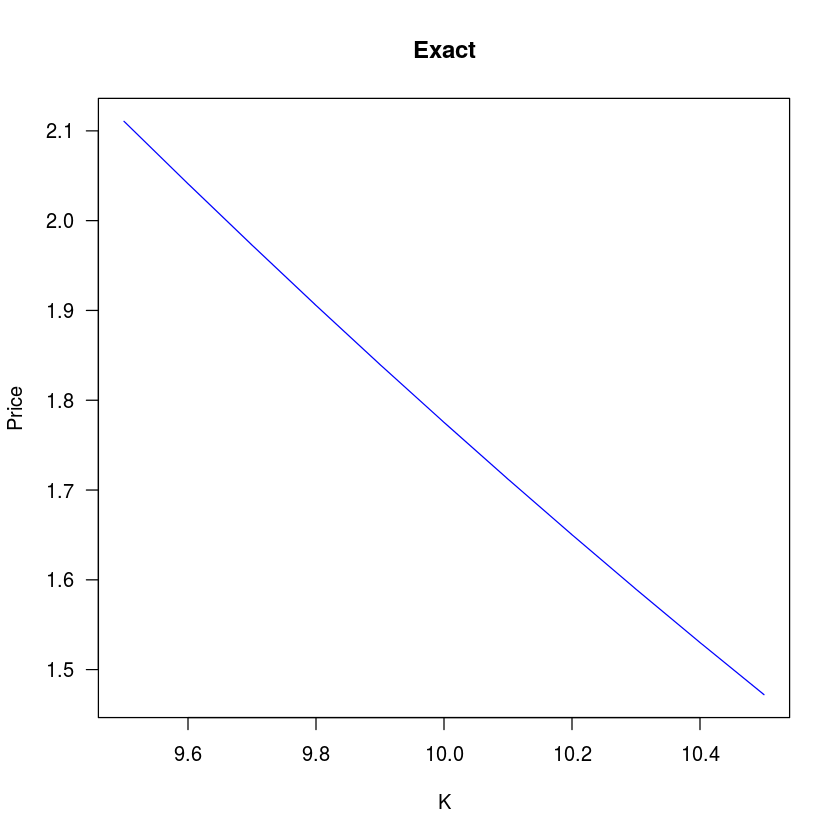

In [30]:
title <- 'Exact'
exact_sin <- Drifted_Exact(num_paths, beta,
                               mu=make_mu_sin(a=1, k=2*pi*n, phi=-0.5*pi, b=1),
                               sigma0=sigma0,
                               Texp=Texp, X0=X0)

sin_vols[title] <- run_simulation(exact_sin, strikes, Texp, X0, make_call_payoff,
                                  plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Comparing Prices

pdf 
  2

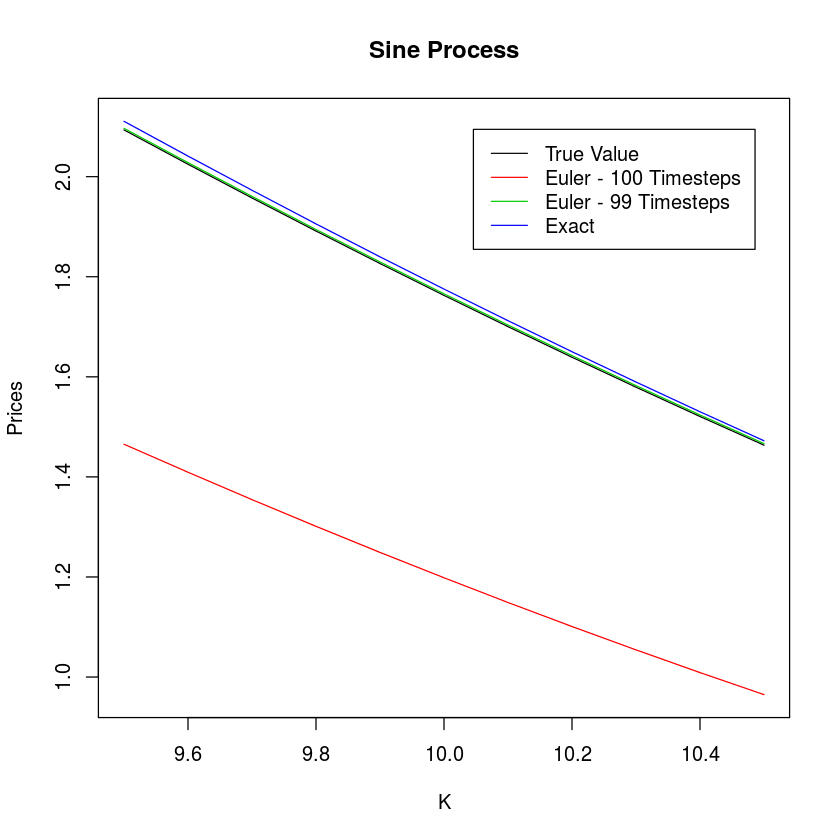

In [31]:
plot_values(sin_vols, 'Sine Process', ylab='Prices')

## Ornstein–Uhlenbeck Process

$$ X_0=1, \,\,\,\, dX_t = -\lambda(X_t - \bar x) dt + \sigma dW_t$$

### Parameters

In [32]:
num_paths <- 1000000
num_steps_euler <- 100
beta <- 0.2

Texp <- 1
X0 <- 1
lambda <- 0.1
xbar <- 1
sigma0 <- 0.3
strikes <- seq(0.5, 1.5, by=0.1)
ou_vols <- data.frame(K=strikes)

### Euler Scheme

     K     Variance
1  0.5 0.0762142761
2  0.6 0.0709062915
3  0.7 0.0628408167
4  0.8 0.0521775270
5  0.9 0.0399775290
6  1.0 0.0279109598
7  1.1 0.0175995631
8  1.2 0.0099713185
9  1.3 0.0050683470
10 1.4 0.0023142499
11 1.5 0.0009518146


Time Elapsed: 15.40343 

     K       Price
1  0.5 0.504551634
2  0.6 0.410426705
3  0.7 0.321595781
4  0.8 0.240838017
5  0.9 0.170954638
6  1.0 0.114088123
7  1.1 0.071027243
8  1.2 0.040950495
9  1.3 0.021717249
10 1.4 0.010534262
11 1.5 0.004660762


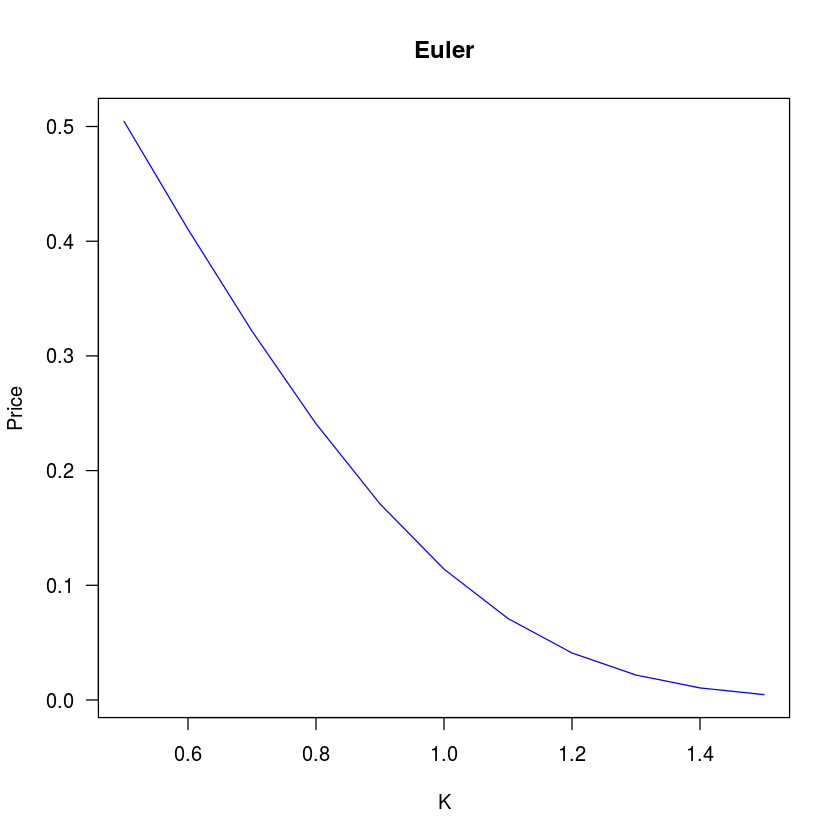

In [33]:
title <- 'Euler'
euler_ou <- General_Euler(num_paths, num_steps_euler,
                          mu=make_mean_reverting_coefficient(lambda, xbar),
                          sigma=make_constant_coefficient(sigma0),
                          Texp=Texp, X0=X0)

ou_vols[title] <- run_simulation(euler_ou, strikes, Texp, X0, make_call_payoff,
                                 plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Exact Scheme

     K    Variance
1  0.5 0.165921235
2  0.6 0.139296982
3  0.7 0.113714396
4  0.8 0.089065542
5  0.9 0.066026537
6  1.0 0.045853231
7  1.1 0.029698227
8  1.2 0.017960144
9  1.3 0.010162024
10 1.4 0.005423954
11 1.5 0.002749094


Time Elapsed: 6.782087 

     K      Price
1  0.5 0.50460626
2  0.6 0.41051772
3  0.7 0.32170234
4  0.8 0.24091352
5  0.9 0.17097566
6  1.0 0.11402051
7  1.1 0.07088900
8  1.2 0.04078955
9  1.3 0.02159423
10 1.4 0.01047206
11 1.5 0.00466384


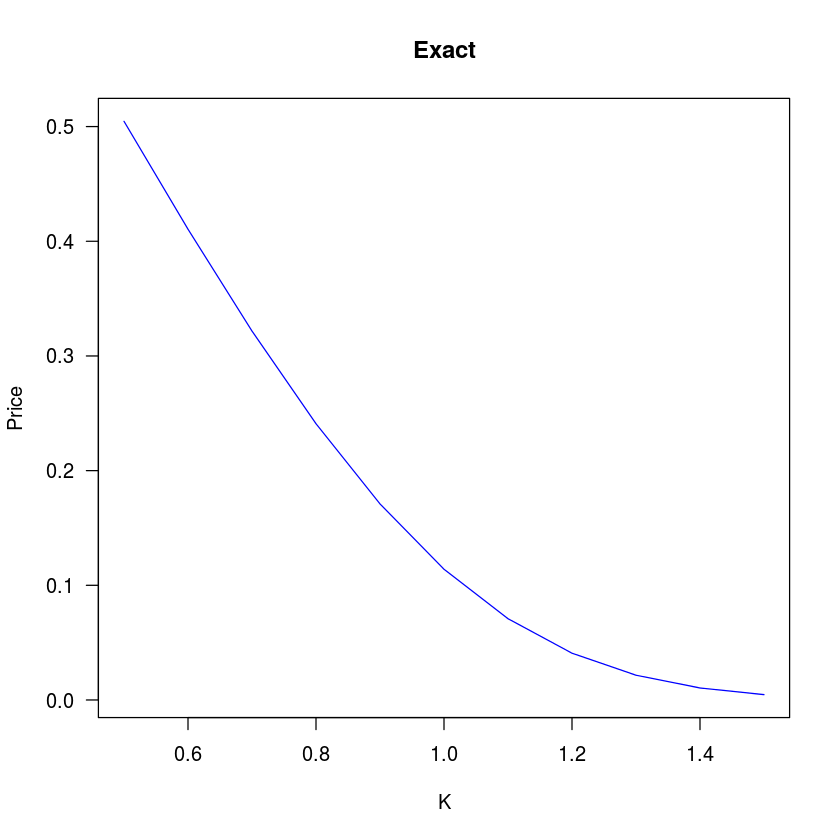

In [34]:
title <- 'Exact'
euler_ou <- Drifted_Exact(num_paths, beta,
                          mu=make_mean_reverting_coefficient(lambda, xbar),
                          sigma=sigma0,
                          Texp=Texp, X0=X0)

ou_vols[title] <- run_simulation(euler_ou, strikes, Texp, X0, make_call_payoff,
                                 plot_title=title, num_paths_to_plot=FALSE, return_ivols=FALSE)

### Comparing Prices

pdf 
  2

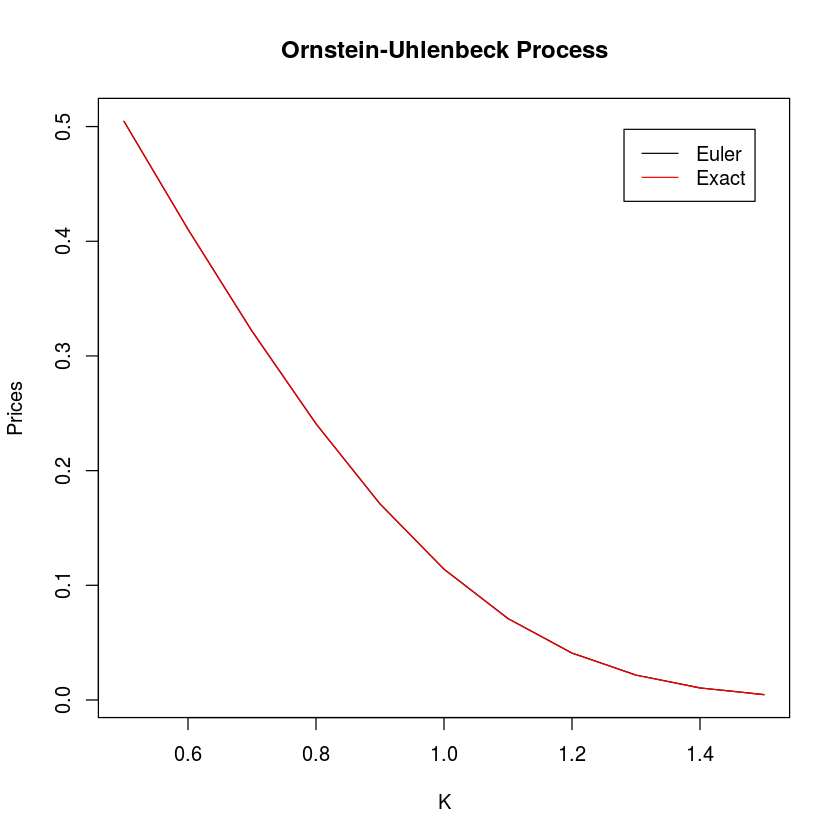

In [35]:
plot_values(ou_vols, 'Ornstein-Uhlenbeck Process', ylab='Prices')